# Importing Libraries 

In [19]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.ensemble import IsolationForest
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score
import seaborn as sns 
from sklearn.preprocessing import StandardScaler


# Data importing and Pre-processing 

In [3]:
df=pd.read_csv("data.csv")

In [4]:
df.head()


,d3mIndex,timestamp,value,ground_truth
0,0,1472918400,0.234191,0
1,1,1472918700,0.236657,0
2,2,1472919000,0.230887,0
3,3,1472919300,0.217486,0
4,4,1472919600,0.223722,0


In [5]:
df.tail()

,d3mIndex,timestamp,value,ground_truth
8779,8779,1475552100,0.305849,0
8780,8780,1475552400,0.308899,0
8781,8781,1475552700,0.307782,0
8782,8782,1475553000,0.309060,0
8783,8783,1475553300,0.309851,0


In [6]:
df.shape

(8784, 4)

In [7]:
df["ground_truth"].value_counts()

ground_truth
0    8771
1      13
Name: count, dtype: int64

In [8]:
df.isnull().sum()

d3mIndex        0
timestamp       0
value           0
ground_truth    0
dtype: int64

In [9]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')


In [10]:
df.dtypes

d3mIndex                 int64
timestamp       datetime64[ns]
value                  float64
ground_truth             int64
dtype: object

In [11]:
df.to_csv("cleaned.csv")

In [12]:
df=pd.read_csv("cleaned.csv")

# Exploratory Data Analysis

In [13]:
mean_value = df['value'].mean()
median_value = df['value'].median()
std_dev_value = df['value'].std()

mean_value, median_value, std_dev_value


(0.1965077651477254, 0.1941974233448476, 0.10410561015958755)

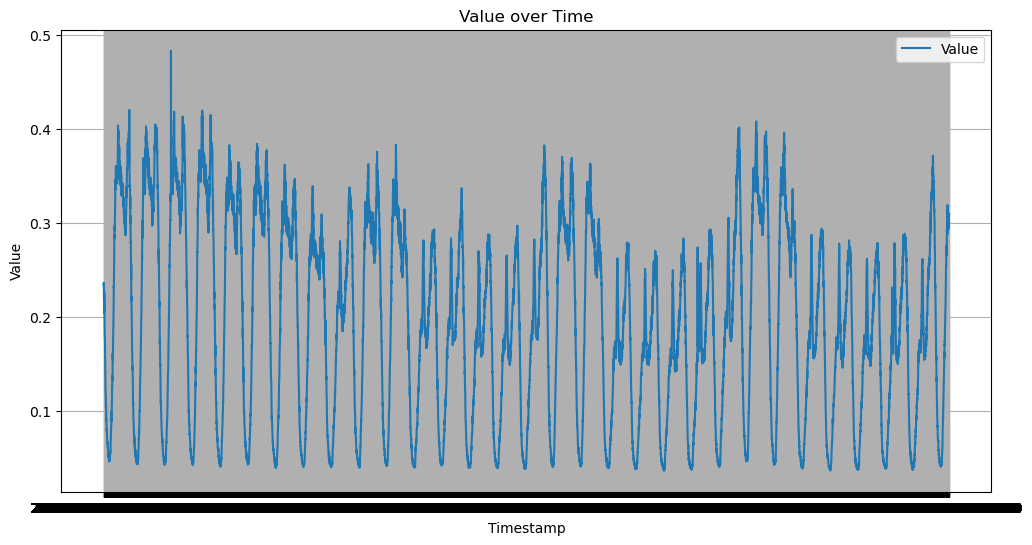

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['value'], label='Value')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Value over Time')
plt.legend()
plt.grid(True)
plt.show()

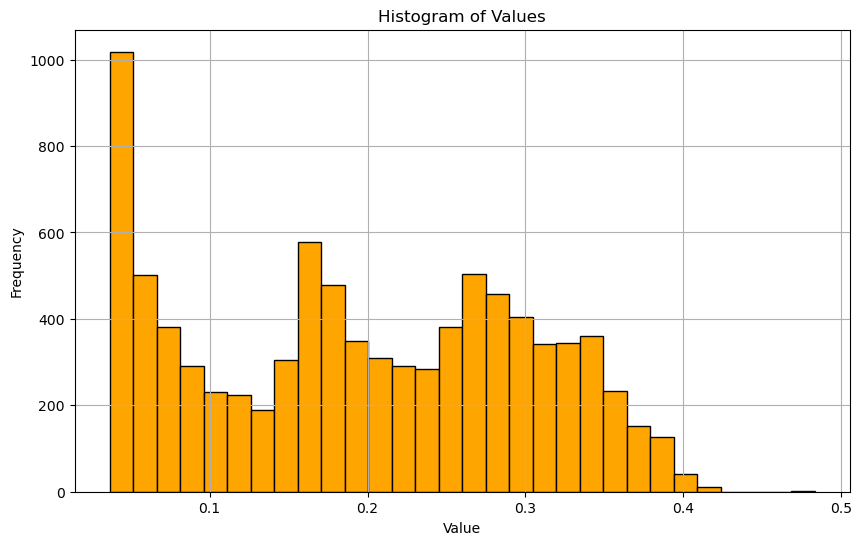

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(df['value'], bins=30, color='orange', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Values')
plt.grid(True)
plt.show()

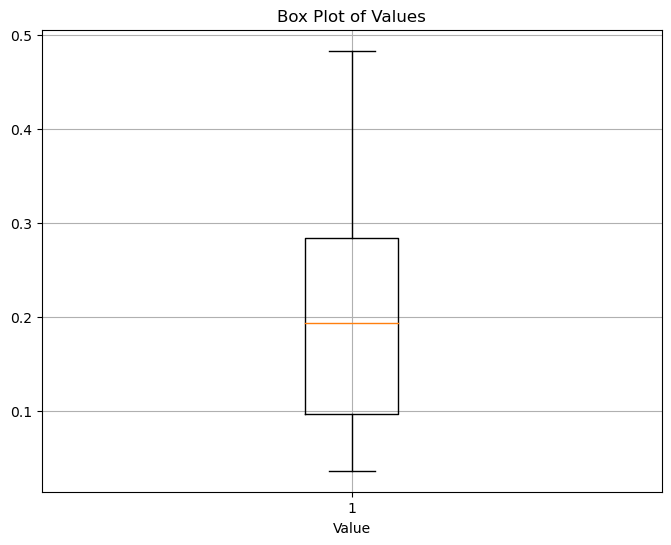

In [16]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['value'])
plt.xlabel('Value')
plt.title('Box Plot of Values')
plt.grid(True)
plt.show()

# Anomaly Detection

## Isolation Forest 

In [28]:
df.head()

,Unnamed: 0,d3mIndex,timestamp,value,ground_truth,value_scaled,anomaly
0,0,0,2016-09-03 16:00:00,0.234191,0,0.361992,1
1,1,1,2016-09-03 16:05:00,0.236657,0,0.385683,1
2,2,2,2016-09-03 16:10:00,0.230887,0,0.330256,1
3,3,3,2016-09-03 16:15:00,0.217486,0,0.201524,1
4,4,4,2016-09-03 16:20:00,0.223722,0,0.261420,1
